## 1. Ví dụ về phân loại hoa theo đặc trưng cơ bản.

In [1]:
##B1: import thu vien
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [3]:
#B2: chuẩn bị dữ liệu: [chiều cao (cm), đường kính bông (cm)]
hoa_hong = [[40, 6], [42, 5], [38, 6], [45, 7], [43, 6],
            [41, 7], [44, 6], [39, 5], [46, 7], [42, 6],
            [40, 5], [47, 7], [43, 5], [41, 6], [44, 7],
            [45, 6], [39, 6], [42, 7], [46, 6], [43, 7],
            [41, 5], [40, 7], [44, 5], [45, 7], [42, 6]]

hoa_cuc = [[25, 3], [28, 4], [26, 3], [30, 4], [27, 3],
           [29, 4], [24, 3], [28, 3], [26, 4], [30, 3],
           [25, 4], [27, 3], [29, 4], [24, 4], [28, 3],
           [26, 4], [25, 3], [30, 4], [27, 4], [29, 3],
           [24, 3], [28, 4], [26, 3], [30, 4], [27, 3]]

# Nếu bông hoa có chiều cao khoảng 40–46 cm, đường kính 5–7 cm → KNN dự đoán là Hoa Hồng 
# Nếu bông hoa có chiều cao khoảng 24–30 cm, đường kính 3–4 cm → KNN dự đoán là Hoa Cúc 

# Gộp dữ liệu
X = np.array(hoa_hong + hoa_cuc)   # mảng đặc trưng (features)
y = np.array([0]*25 + [1]*25)      # nhãn (0 = Hoa Hồng, 1 = Hoa Cúc)

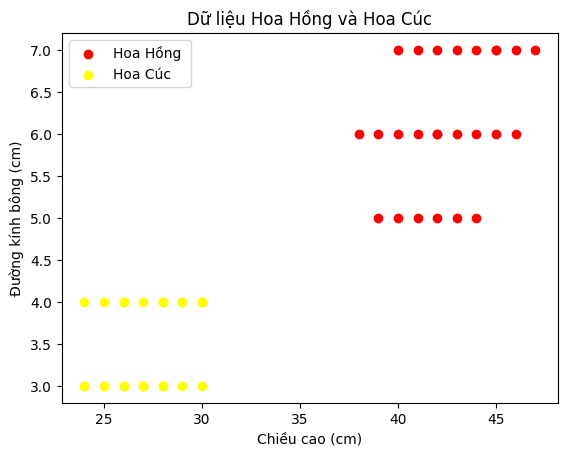

In [15]:
#B3: Trực quan hóa dữ liệu.
plt.scatter(X[:25, 0], X[:25, 1], color='red', label='Hoa Hồng ')
plt.scatter(X[25:, 0], X[25:, 1], color='yellow', label='Hoa Cúc ')

plt.xlabel("Chiều cao (cm)")
plt.ylabel("Đường kính bông (cm)")
plt.legend()
plt.title("Dữ liệu Hoa Hồng và Hoa Cúc")
plt.show()

In [7]:
# B1: Fit = lưu dữ liệu
def fit(X, y):
    return X, y

# B2: Hàm tính khoảng cách Euclidean
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# B3: Predict cho 1 điểm
def predict_one(X, y, new_point, k=3):
    # Tính khoảng cách từ new_point đến tất cả dữ liệu
    distances = [euclidean_distance(new_point, x) for x in X]
    
    # Lấy index của k điểm gần nhất
    k_indices = np.argsort(distances)[:k]
    
    # Lấy nhãn của k điểm gần nhất
    k_labels = [y[i] for i in k_indices]
    
    # Bỏ phiếu đa số
    counts = np.bincount(k_labels)
    return np.argmax(counts)

# B4: Predict cho nhiều điểm
def Predict(X, y, new_points, k=3):
    return [int(predict_one(X, y, point, k)) for point in new_points]

In [17]:
#Fit
X_train, y_train = fit(X, y)
#Predict
mau_thu = np.array([[43, 6]])
du_doan = Predict(X_train, y_train, mau_thu, k=3)

print("Kết quả dự đoán:", du_doan)

Kết quả dự đoán: [0]


In [ ]:
# #B4: Xây dựng mô hình KNN
# knn = KNeighborsClassifier(n_neighbors=3)  
# knn.fit(X, y)

In [30]:
# #B5: Dự đoán
# mau_thu = np.array([[42.5, 6.5]])  # 1 bông mới có đặc trưng
# du_doan = knn.predict(mau_thu)

# print("Kết quả dự đoán:", du_doan)

Kết quả dự đoán: [0]


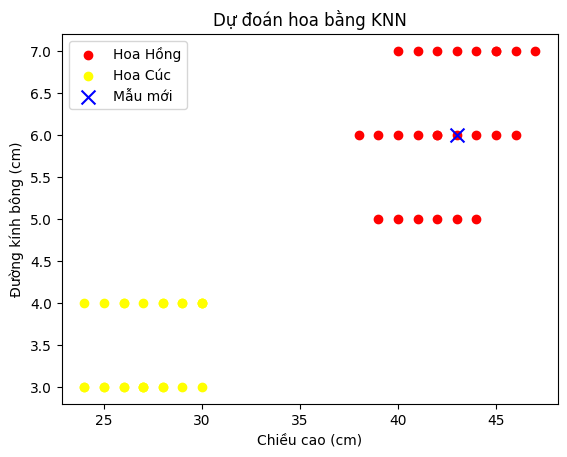

In [18]:
#B6: Trực quan hóa kết quả dự đoán
plt.scatter(X[:25, 0], X[:25, 1], color='red', label='Hoa Hồng')
plt.scatter(X[25:, 0], X[25:, 1], color='yellow', label='Hoa Cúc')

# Vẽ mẫu dự đoán
plt.scatter(mau_thu[:, 0], mau_thu[:, 1], color='blue', marker='x', s=100, label='Mẫu mới')

plt.xlabel("Chiều cao (cm)")
plt.ylabel("Đường kính bông (cm)")
plt.legend()
plt.title("Dự đoán hoa bằng KNN")
plt.show()
